# Titanic Analysis - The infuence of outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,300.00,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C


In [3]:
"""
Survival - Survival (0 = No; 1 = Yes)
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name - Name
Sex - Sex
Age - Age
Sibsp - Number of Siblings/Spouses Aboard
Parch - Number of Parents/Children Aboard
Ticket - Ticket Number
Fare - Passenger Fare
Cabin - Cabin
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
"""

'\nSurvival - Survival (0 = No; 1 = Yes)\nPclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)\nName - Name\nSex - Sex\nAge - Age\nSibsp - Number of Siblings/Spouses Aboard\nParch - Number of Parents/Children Aboard\nTicket - Ticket Number\nFare - Passenger Fare\nCabin - Cabin\nEmbarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)\n'

### Checking data types

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Checking and treating nulls values 

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df = df.drop(['PassengerId'], axis=1)
df = df.drop(['Name'], axis=1)
df = df.drop(['Ticket'], axis=1)
df = df.drop(['Cabin'], axis=1)
df['Age'] = df['Age'].fillna(round(df['Age'].mean()))
df = df.dropna()
df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
display(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S
1,1,1,female,38.0,1,0,712833.00,C
2,1,3,female,26.0,0,0,7925.00,S
3,1,1,female,35.0,1,0,53.10,S
4,0,3,male,35.0,0,0,300.00,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,30.0,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C


### Checking for outliers

In [9]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [10]:
quali = []
quant = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        quali.append(i)
    else:
        quant.append(i)

df_quali = df[quali]
df_quant = df[quant]

In [11]:
display(df_quali)

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [12]:
display(df_quant)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.25
1,1,1,38.0,1,0,712833.00
2,1,3,26.0,0,0,7925.00
3,1,1,35.0,1,0,53.10
4,0,3,35.0,0,0,300.00
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.00
887,1,1,19.0,0,0,30.00
888,0,3,30.0,1,2,23.45
889,1,1,26.0,0,0,30.00


{'whiskers': [<matplotlib.lines.Line2D at 0x2119b36f520>,
 'caps': [<matplotlib.lines.Line2D at 0x2119b36fa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2119b36f280>],
 'medians': [<matplotlib.lines.Line2D at 0x2119b36ffa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2119b39c280>],
 'means': []}

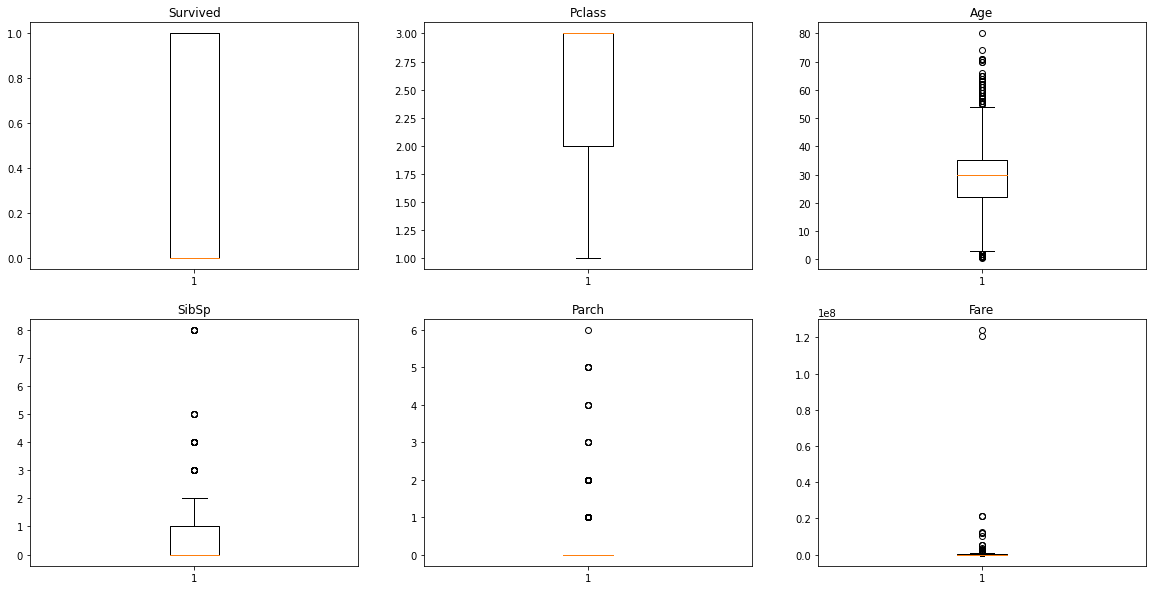

In [13]:
fig, axis = plt.subplots(2, 3, figsize=(20, 10))

axis[0,0].set_title('Survived')
axis[0,0].boxplot(df_quant.Survived)

axis[0,1].set_title('Pclass')
axis[0,1].boxplot(df_quant.Pclass)

axis[0,2].set_title('Age')
axis[0,2].boxplot(df_quant.Age)

axis[1,0].set_title('SibSp')
axis[1,0].boxplot(df_quant.SibSp)

axis[1,1].set_title('Parch')
axis[1,1].boxplot(df_quant.Parch)

axis[1,2].set_title('Fare')
axis[1,2].boxplot(df_quant.Fare)

In [14]:
outliers = []

for i in df_quant.columns:
    q3 = np.quantile(df_quant[i], 0.75)
    q1 = np.quantile(df_quant[i], 0.25)
    dist = q3 - q1
    upper_lim = q3 + 1.5*dist
    lower_lim = q1 - 1.5*dist
    
    outlier = 0
    
    for j in df_quant.index:
        if df_quant[i][j] < lower_lim or df_quant[i][j] > upper_lim:
            outlier += 1
        else:
            pass
        
    outliers.append(outlier)
    
df_outliers = pd.DataFrame()
df_outliers['variables'] = df_quant.columns
df_outliers['outliers'] = outliers
df_outliers['percentage'] = (outliers/df.Survived.count())*100

display(df_outliers)

,variables,outliers,percentage
0,Survived,0,0.000000
1,Pclass,0,0.000000
2,Age,66,7.424072
3,SibSp,46,5.174353
4,Parch,213,23.959505
5,Fare,153,17.210349


### 1° Case: remove outliers (not a good practice)

In [17]:
check_list = []

for i in df_outliers.index:
    if df_outliers.outliers[i] != 0:
        check_list.append(df_outliers.variables[i])
    else:
        pass

df_removed = df.copy()

for i in check_list:

    q3 = np.quantile(df_removed[i], 0.75)
    q1 = np.quantile(df_removed[i], 0.25)
    dist = q3 - q1
    upper_lim = q3 + 1.5*dist
    lower_lim = q1 - 1.5*dist

    for j in df_removed.index:

        if df_removed[i][j] > upper_lim or df_removed[i][j] < lower_lim:
            df_removed = df_removed.drop(j)         
        else:
            pass

### 2° Case: ignore outliers

In [25]:
# In this case it is going to be used the original data from df, without changes

### 3° Case: Replace outliers for the median

In [21]:
df_median = df.copy()

for i in check_list:

    q3 = np.quantile(df_median[i], 0.75)
    q1 = np.quantile(df_median[i], 0.25)
    dist = q3 - q1
    upper_lim = q3 + 1.5*dist
    lower_lim = q1 - 1.5*dist

    median = df_median[i].median()

    for j in df_median.index:

        if df_median[i][j] > upper_lim or df_median[i][j] < lower_lim:
            df_median[i][j] = median
        else:
            pass

C:\Users\User W10\AppData\Local\Temp\ipykernel_16284\170886188.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_median[i][j] = median
C:\Users\User W10\AppData\Local\Temp\ipykernel_16284\170886188.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_median[i][j] = median
C:\Users\User W10\AppData\Local\Temp\ipykernel_16284\170886188.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_median[i][j] = median
C:\Users\User W1

### Comparing results

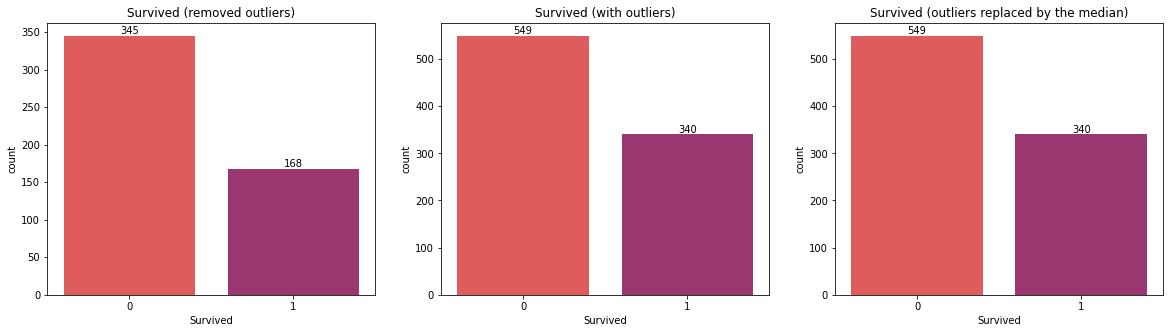

In [60]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))

axis[0].set_title('Survived (removed outliers)')
sns.countplot(ax=axis[0], data=df_removed, x='Survived', palette='flare', saturation=1)
for i in axis[0].containers:
    axis[0].bar_label(i)

axis[1].set_title('Survived (with outliers)')
sns.countplot(ax=axis[1], data=df, x='Survived', palette='flare', saturation=1)
for i in axis[1].containers:
    axis[1].bar_label(i)

axis[2].set_title('Survived (outliers replaced by the median)')
sns.countplot(ax=axis[2], data=df_median, x='Survived', palette='flare', saturation=1)
for i in axis[2].containers:
    axis[2].bar_label(i)

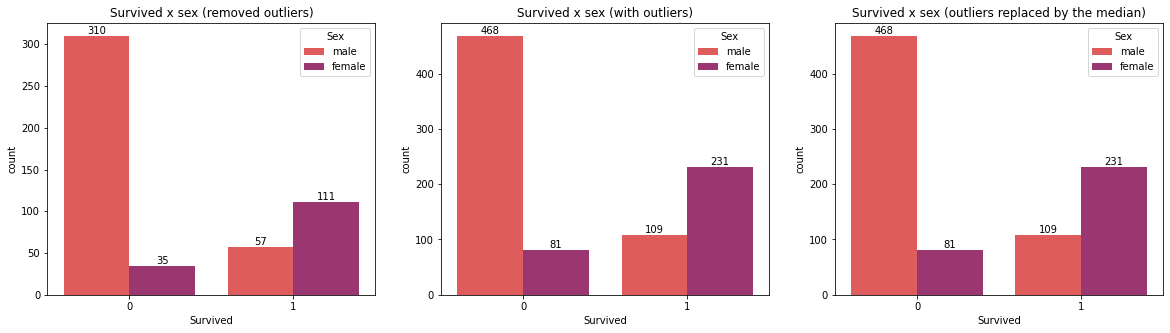

In [75]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))

axis[0].set_title('Survived x sex (removed outliers)')
sns.countplot(ax=axis[0], data=df_removed, x='Survived', hue='Sex', palette='flare', saturation=1)
for i in axis[0].containers:
    axis[0].bar_label(i)

axis[1].set_title('Survived x sex (with outliers)')
sns.countplot(ax=axis[1], data=df, x='Survived', hue='Sex', palette='flare', saturation=1)
for i in axis[1].containers:
    axis[1].bar_label(i)

axis[2].set_title('Survived x sex (outliers replaced by the median)')
sns.countplot(ax=axis[2], data=df_median, x='Survived', hue='Sex', palette='flare', saturation=1)
for i in axis[2].containers:
    axis[2].bar_label(i)

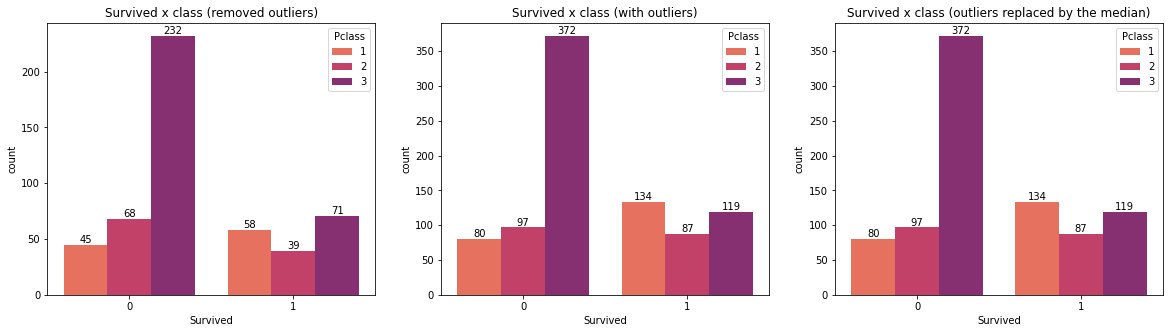

In [74]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))

axis[0].set_title('Survived x class (removed outliers)')
sns.countplot(ax=axis[0], data=df_removed, x='Survived', hue='Pclass', palette='flare', saturation=1)
for i in axis[0].containers:
    axis[0].bar_label(i)

axis[1].set_title('Survived x class (with outliers)')
sns.countplot(ax=axis[1], data=df, x='Survived', hue='Pclass', palette='flare', saturation=1)
for i in axis[1].containers:
    axis[1].bar_label(i)

axis[2].set_title('Survived x class (outliers replaced by the median)')
sns.countplot(ax=axis[2], data=df_median, x='Survived', hue='Pclass', palette='flare', saturation=1)
for i in axis[2].containers:
    axis[2].bar_label(i)

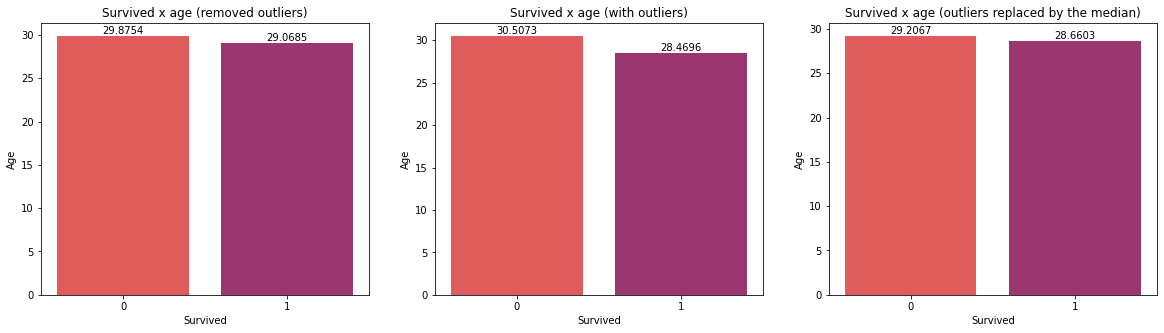

In [68]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))

axis[0].set_title('Survived x age (removed outliers)')
sns.barplot(ax=axis[0], data=df_removed, x='Survived', y='Age', errorbar=None, palette='flare', saturation=1)
for i in axis[0].containers:
    axis[0].bar_label(i)

axis[1].set_title('Survived x age (with outliers)')
sns.barplot(ax=axis[1], data=df, x='Survived', y='Age', errorbar=None, palette='flare', saturation=1)
for i in axis[1].containers:
    axis[1].bar_label(i)

axis[2].set_title('Survived x age (outliers replaced by the median)')
sns.barplot(ax=axis[2], data=df_median, x='Survived', y='Age', errorbar=None, palette='flare', saturation=1)
for i in axis[2].containers:
    axis[2].bar_label(i)

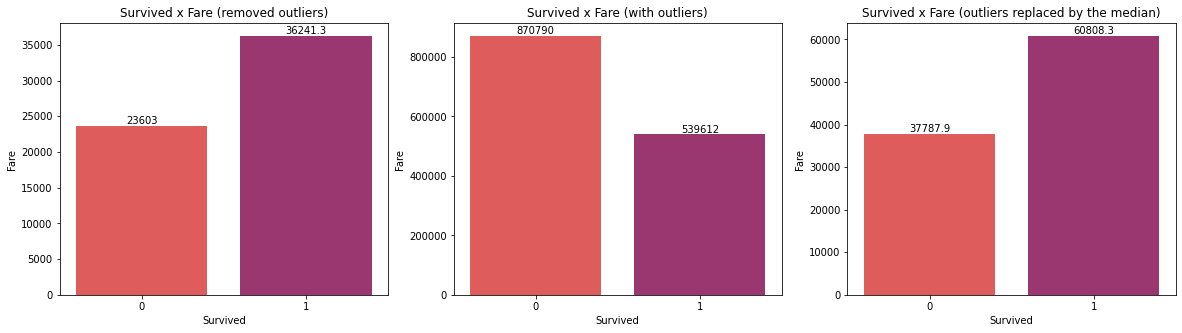

In [71]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))

axis[0].set_title('Survived x Fare (removed outliers)')
sns.barplot(ax=axis[0], data=df_removed, x='Survived', y='Fare', errorbar=None, palette='flare', saturation=1)
for i in axis[0].containers:
    axis[0].bar_label(i)

axis[1].set_title('Survived x Fare (with outliers)')
sns.barplot(ax=axis[1], data=df, x='Survived', y='Fare', errorbar=None, palette='flare', saturation=1)
for i in axis[1].containers:
    axis[1].bar_label(i)

axis[2].set_title('Survived x Fare (outliers replaced by the median)')
sns.barplot(ax=axis[2], data=df_median, x='Survived', y='Fare', errorbar=None, palette='flare', saturation=1)
for i in axis[2].containers:
    axis[2].bar_label(i)

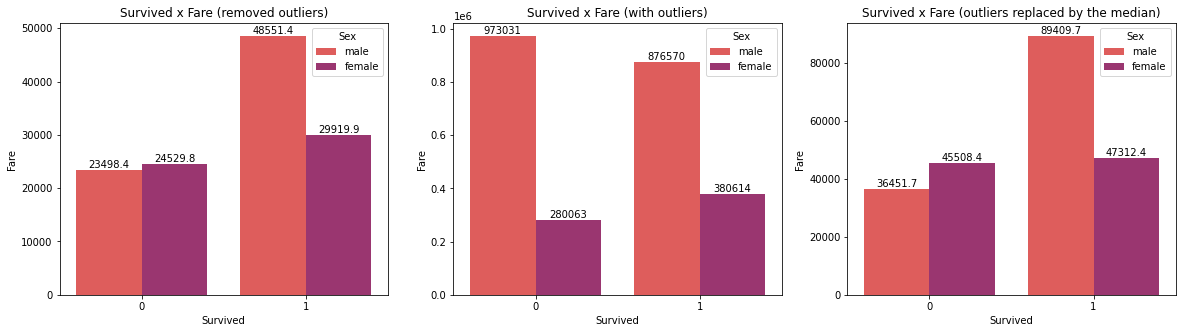

In [72]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))

axis[0].set_title('Survived x Fare (removed outliers)')
sns.barplot(ax=axis[0], data=df_removed, x='Survived', y='Fare', hue='Sex', errorbar=None, palette='flare', saturation=1)
for i in axis[0].containers:
    axis[0].bar_label(i)

axis[1].set_title('Survived x Fare (with outliers)')
sns.barplot(ax=axis[1], data=df, x='Survived', y='Fare', hue='Sex', errorbar=None, palette='flare', saturation=1)
for i in axis[1].containers:
    axis[1].bar_label(i)

axis[2].set_title('Survived x Fare (outliers replaced by the median)')
sns.barplot(ax=axis[2], data=df_median, x='Survived', y='Fare', hue='Sex', errorbar=None, palette='flare', saturation=1)
for i in axis[2].containers:
    axis[2].bar_label(i)

<AxesSubplot: title={'center': 'Heatmap (outliers replaced by the median)'}>

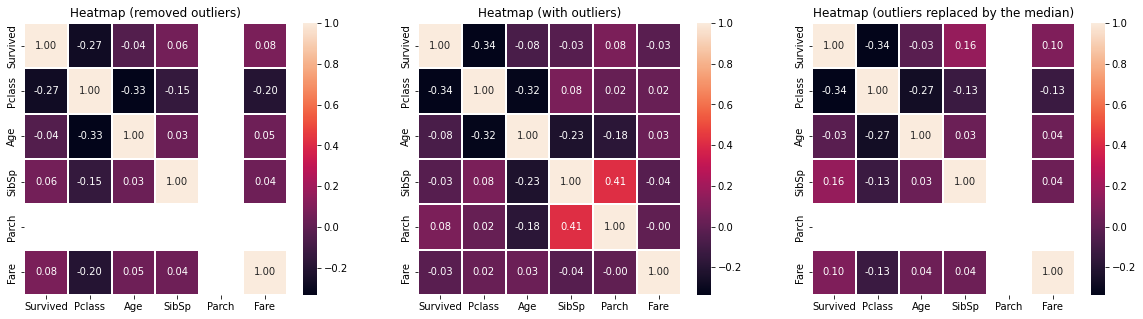

In [73]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))

axis[0].set_title('Heatmap (removed outliers)')
sns.heatmap(df_removed.corr(), ax=axis[0], annot=True, linewidths=1.5, fmt='.2f')

axis[1].set_title('Heatmap (with outliers)')
sns.heatmap(df.corr(), ax=axis[1], annot=True, linewidths=1.5, fmt='.2f')

axis[2].set_title('Heatmap (outliers replaced by the median)')
sns.heatmap(df_median.corr(), ax=axis[2], annot=True, linewidths=1.5, fmt='.2f')